# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [1]:
# !pip install --user scikit-learn --upgrade

Import necessary packages

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples

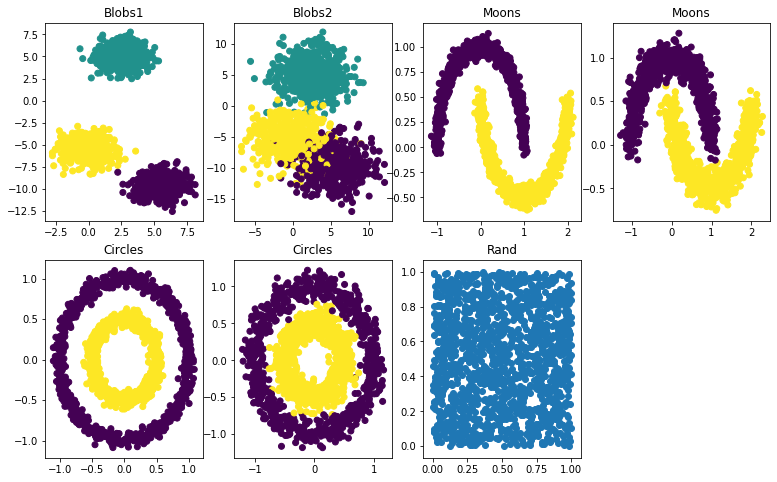

In [95]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [96]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [97]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [98]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>K means is expected to work well on Blob 1 and Blob 2 as they seem to be spherical sized/ globular and evenly sized. K means creates spherical clusters around centorids and since it accounts for distances, evenly sized clusters are prefered.

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> K means is expected not to work well on circle and moon shaped data because they are non convex unlike spherical clusters seen in Blob 1 and Blob 2. K means will fail to maintain the shape of cicle and moon data because we are using eucledian distance from mean point which will include points closer to it from other clusters.



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

2875.5754608105462


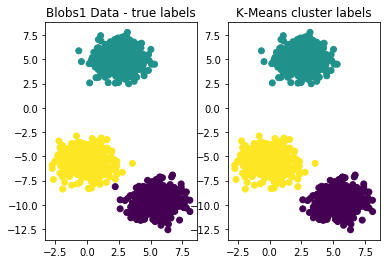

0.99911140760507: Blob 1 Rand Index


In [104]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred_1 = kmeans.fit_predict(Blobs1_X)

score = -kmeans.score(Blobs1_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

a = rand_index(y_pred_1, Blobs1_y) 
print(str(a) + ": Blob 1 Rand Index")

16414.524990244576


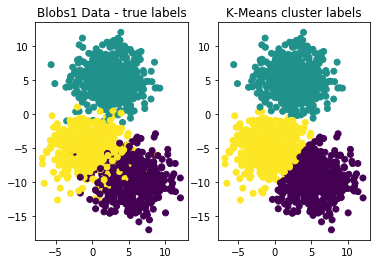

0.9199715365799421: Blob 2 Rand Index


In [8]:
y_pred_2 = kmeans.fit_predict(Blobs2_X)
y_pred_2

score = -kmeans.score(Blobs2_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

b = rand_index(y_pred_2, Blobs2_y) 
print(str(b) + ": Blob 2 Rand Index")

601.2025348798402


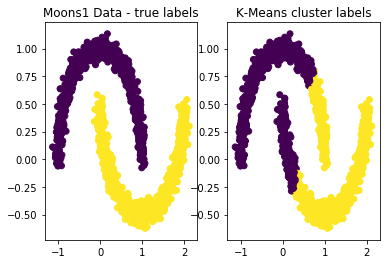

0.6201236379808761: Moons 1 Rand Index


In [105]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred_3 = kmeans.fit_predict(Moons1_X)
y_pred_3

score = -kmeans.score(Moons1_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_3)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

c = rand_index(y_pred_3, Moons1_y) 
print(str(c) + ": Moons 1 Rand Index")

616.0456903326541


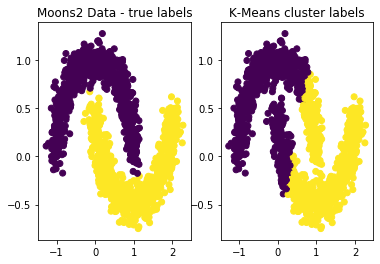

0.6240836112964199: Moons 2 Rand Index


In [106]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred_4 = kmeans.fit_predict(Moons2_X)
y_pred_4

score = -kmeans.score(Moons2_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_4)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

d = rand_index(y_pred_4, Moons2_y) 
print(str(d) + ": Moons 2 Rand Index")

598.020543255273


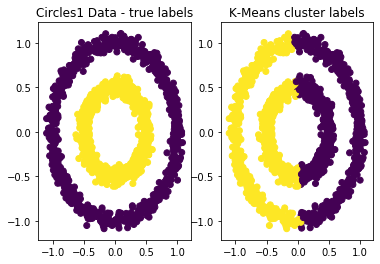

0.4996744496330887: Circles1 Rand Index


In [107]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred_5 = kmeans.fit_predict(Circles1_X)
y_pred_5

score = -kmeans.score(Circles1_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_5)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

e = rand_index(y_pred_5, Circles1_y) 
print(str(e) + ": Circles1 Rand Index")

611.2887285645395


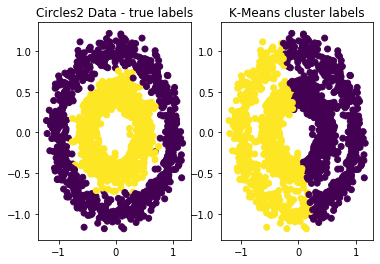

0.4996744496330887: Circles2 Rand Index


In [108]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred_6 = kmeans.fit_predict(Circles2_X)
y_pred_6

score = -kmeans.score(Circles2_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y) # true clusters
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_6)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

f = rand_index(y_pred_6, Circles2_y) 
print(str(f) + ": Circles2 Rand Index")

<span style="color:green">**Answer 1c:** </span> Based on the visualization, rank of the datasets in decreasing order of K-means performance - Blob 1 > Blob 2 > Moons2 > Moons1 > Circles2 = Circles1. This is because Blob1 is spherical and most separated followed by Blob 2. Moons and Circle have non convex shapes.Between Moons and Circles, more misclassification is happening in Circles as compared to Moons. Moon2 seems to have better classification than Moon1, though it's tough to tell visually. Circles 2 and Circles 1 have almost same type of misscalssifcation as seen visually.


<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer 1d:** </span> Decreasing order of Rand-Index scores:
<br>0.99911140760507: Blob 1 Rand Index
<br>0.9199715365799421: Blob 2 Rand Index
<br>0.6240836112964199: Moons 2 Rand Index
<br>0.6201236379808761: Moons 1 Rand Index
<br>0.4996744496330887: Circles1 Rand Index = 0.4996744496330887: Circles2 Rand Index







<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Rankings seem to be consistent as per the visual inspection ranking. It was a close rank index difference between Moons 2 and Moons 1 and for Circles 1 and Circles 2 it came out to be almost the same, even visually it was very tough to comment between Moons2, Moons1 and Circles2 and Circles1 which performed better.





### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Single link clustering works by finding the min distance between the two clusters, hence more the clusters are separated they will perform better for Single link clustering. Hence, it's expected that Blobs1, Moons1 and Circles1 will perform better.



<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> As Blobs2 has an overlap of datapoints between clusters it will not perform well. And similarly though the data is ellipsoidal for Moons2 and Circles2 we can see the clusters are close to each other making it prone to fail while using single link



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span> Decreasing order of Single-link agglomerative algorithm performance

<br> Blobs 1= Moons 1 = Circles 1 > Moons 2 = Circles 2 > Blobs 2

<br> Rationale : The ranking was given as per the datapoint separation between two clusters so that min distance can be found more easily.



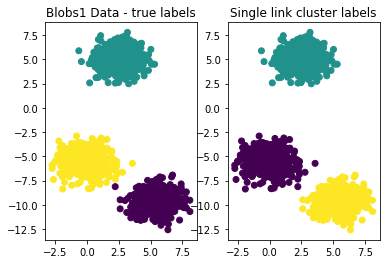

0.99911140760507: Blobs 1 Rand Index


In [109]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred = single_linkage.fit_predict(Blobs1_X)

plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Single link cluster labels')
plt.show()

a = rand_index(y_pred, Blobs1_y)
print(str(a) + ": Blobs 1 Rand Index")

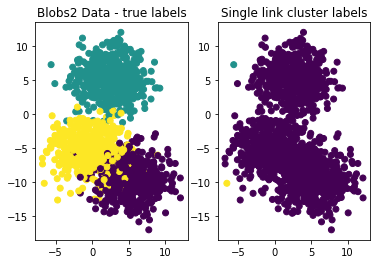

0.33377896375361354: Blobs 2 Rand Index


In [14]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y2_pred = single_linkage.fit_predict(Blobs2_X)

plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y2_pred)
plt.title('Single link cluster labels')
plt.show()

b = rand_index(y2_pred, Blobs2_y)
print(str(b) + ": Blobs 2 Rand Index")

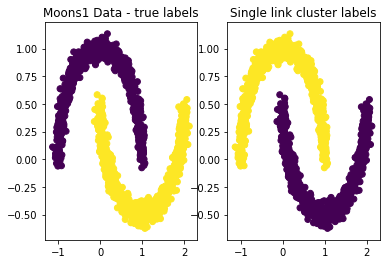

1.0: Moons 1 Rand Index


In [15]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y3_pred = single_linkage.fit_predict(Moons1_X)

plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y3_pred)
plt.title('Single link cluster labels')
plt.show()

c = rand_index(y3_pred, Moons1_y)
print(str(c) + ": Moons 1 Rand Index")

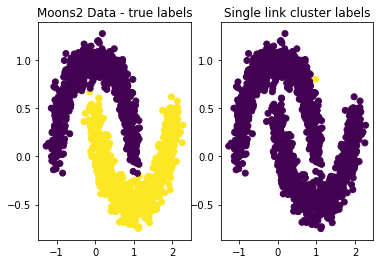

0.49966733377807426: Moons 2 Rand Index


In [16]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y4_pred = single_linkage.fit_predict(Moons2_X)

plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y4_pred)
plt.title('Single link cluster labels')
plt.show()

d = rand_index(y4_pred, Moons2_y)
print(str(d) + ": Moons 2 Rand Index")

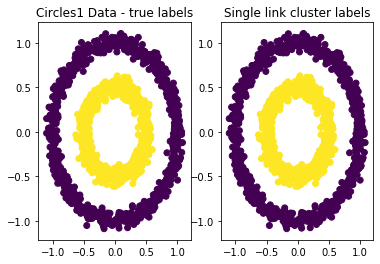

1.0: Circles 1 Rand Index


In [17]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y5_pred = single_linkage.fit_predict(Circles1_X)

plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y5_pred)
plt.title('Single link cluster labels')
plt.show()

e = rand_index(y5_pred, Circles1_y)
print(str(e) + ": Circles 1 Rand Index")

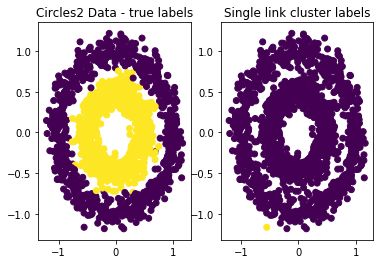

0.49966733377807426: Circles 2 Rand Index


In [18]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y6_pred = single_linkage.fit_predict(Circles2_X)

plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y6_pred)
plt.title('Single link cluster labels')
plt.show()

f = rand_index(y6_pred, Circles2_y)
print(str(f) + ": Circles 2 Rand Index")

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> Datasets in decreasing order of Rand-Index scores:
<br>1.0: Moons 1 Rand Index
<br>1.0: Circles 1 Rand Index
<br>0.99911140760507: Blobs 1 Rand Index
<br>0.49966733377807426: Moons 2 Rand Index
<br>0.49966733377807426: Circles 2 Rand Index
<br>0.33377896375361354: Blobs 2 Rand Index



<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> The ranking came out to be consistent as per visualization as expected because of datapoints separation between clusters.



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Max link tries to find the max distance between two clusters hence it is biased towards compact and tight clusters such as spherical clusters. So, it's expected that it will work well on blobs dataset.



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Max link generally fails when data points are stretched and not compact and globular, so for shapes like moons and circles it's expected that average link won't perform that well.



<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span> The datasets in decreasing order of Max-link agglomerative algorithm performance:

Blobs1> Blobs2> Moons1> Moons2> Circles1> Circles2.

This is because the blobs1 data is globular and compact. There is some overlap between datapoints in blobs2, hence it is lower than blobs1. As the data is getting bigger and stretched out from Moons1 to Moons2 and then more spread out for CIrcles1 and Circles2 we are seeing a degrade in performance of Max link clustering.  



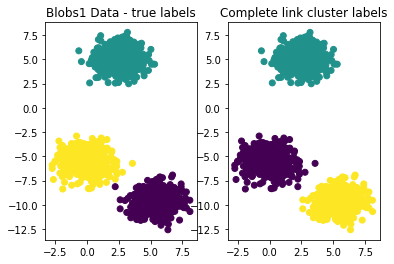

0.99911140760507: Blobs 1 Rand Index


In [19]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred = complete_linkage.fit_predict(Blobs1_X)

plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Complete link cluster labels')
plt.show()

a = rand_index(y_pred, Blobs1_y)
print(str(a) + ": Blobs 1 Rand Index")

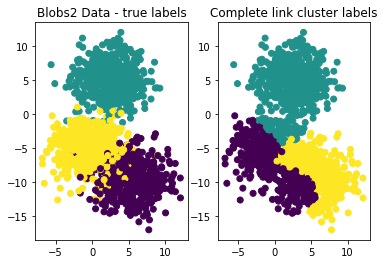

0.7736544362908606: Blobs 2 Rand Index


In [20]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y2_pred = complete_linkage.fit_predict(Blobs2_X)

plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y2_pred)
plt.title('Complete link cluster labels')
plt.show()

b = rand_index(y2_pred, Blobs2_y)
print(str(b) + ": Blobs 2 Rand Index")

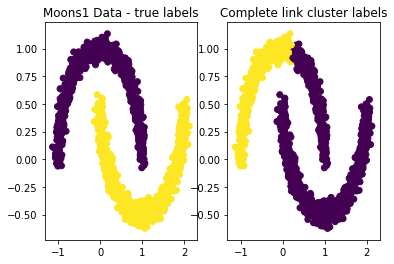

0.662605292417167: Moons1 Rand Index


In [21]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y3_pred = complete_linkage.fit_predict(Moons1_X)

plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y3_pred)
plt.title('Complete link cluster labels')
plt.show()

c = rand_index(y3_pred, Moons1_y)
print(str(c) + ": Moons1 Rand Index")

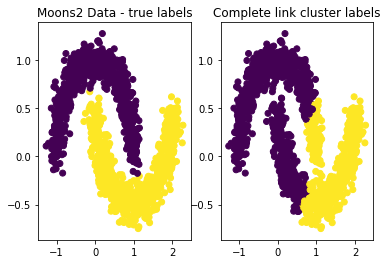

0.5965310206804536: Moons2 Rand Index


In [22]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y4_pred = complete_linkage.fit_predict(Moons2_X)

plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y4_pred)
plt.title('Complete link cluster labels')
plt.show()

d = rand_index(y4_pred, Moons2_y)
print(str(d) + ": Moons2 Rand Index")

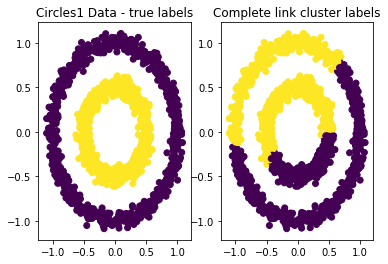

0.5218714698688014: Circles1 Rand Index


In [23]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y5_pred = complete_linkage.fit_predict(Circles1_X)

plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y5_pred)
plt.title('Complete link cluster labels')
plt.show()

e = rand_index(y5_pred, Circles1_y)
print(str(e) + ": Circles1 Rand Index")

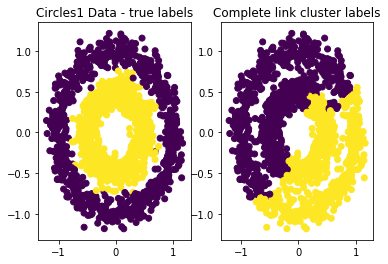

0.5000587058038692: Circles2 Rand Index


In [24]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y6_pred = complete_linkage.fit_predict(Circles2_X)

plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y6_pred)
plt.title('Complete link cluster labels')
plt.show()

f = rand_index(y6_pred, Circles2_y)
print(str(f) + ": Circles2 Rand Index")

<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> The datasets in decreasing order of Rand-Index scores.
<br>0.99911140760507: Blobs 1 Rand Index
<br>0.7736544362908606: Blobs 2 Rand Index
<br>0.662605292417167: Moons1 Rand Index
<br>0.5965310206804536: Moons2 Rand Index
<br>0.5218714698688014: Circles1 Rand Index
<br>0.5000587058038692: Circles2 Rand Index




<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Ranking came out to be consisten as per Rand Index and visual inspection indicating Max link clustering's bias towards globular shaped, compact data and it's inability to handle spread out and stretched data for shaped like Moons2 and Circles1 and Circles2.



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Average link algorithm relies on the average distance of the points between the two clusters, hence it is expected that the algorithm will work well on globular, compact data. Thus shapes like blobs are preferred.



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>  Average link algorithm relies on the average distance of the points between the two clusters, hence it is biased towards globular, compact data and might potentially fail for strectched data sets with non convex shaped. It might have difficulty to perfrom on shapes like Moons and Circles as they are non convex.



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span> The datasets in decreasing order of Average-link agglomerative algorithm performance:

Blobs1 > Blobs2 > Moons1 = Moons2 > Circles1 = Circles2

Rationale : As avg link is taking distance of each point of cluster from one cluster to another, it is expected well to work on separated globular datasets. Hence, blobs are preferred over moons and circles datasets. 


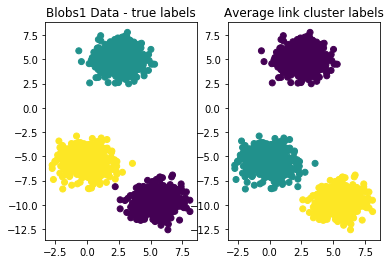

0.99911140760507: Blobs 1 Rand Index


In [25]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred = average_linkage.fit_predict(Blobs1_X)

plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Average link cluster labels')
plt.show()

a = rand_index(y_pred, Blobs1_y)
print(str(a) + ": Blobs 1 Rand Index")

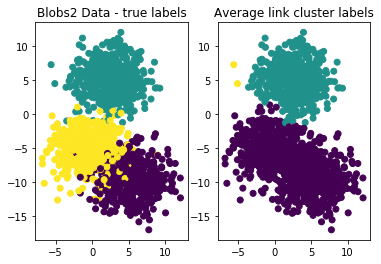

0.7636575494774294: Blobs 2 Rand Index


In [26]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y2_pred = average_linkage.fit_predict(Blobs2_X)

plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y2_pred)
plt.title('Average link cluster labels')
plt.show()

b = rand_index(y2_pred, Blobs2_y)
print(str(b) + ": Blobs 2 Rand Index")


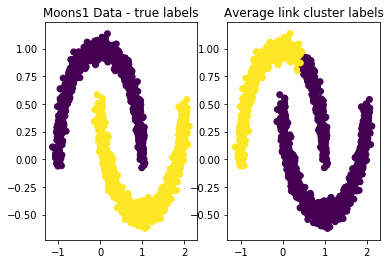

0.7132310429175005: Moons1 Rand Index


In [27]:
n_clusters = 2
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y3_pred = average_linkage.fit_predict(Moons1_X)

plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y3_pred)
plt.title('Average link cluster labels')
plt.show()

c = rand_index(y3_pred, Moons1_y)
print(str(c) + ": Moons1 Rand Index")


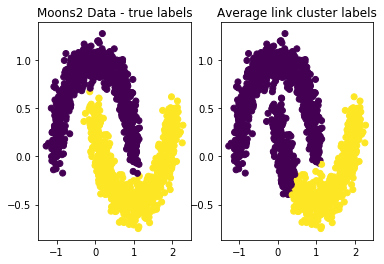

0.7457647320435846: Moons2 Rand Index


In [28]:
n_clusters = 2
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y4_pred = average_linkage.fit_predict(Moons2_X)

plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y4_pred)
plt.title('Average link cluster labels')
plt.show()

d = rand_index(y4_pred, Moons2_y)
print(str(d) + ": Moons2 Rand Index")

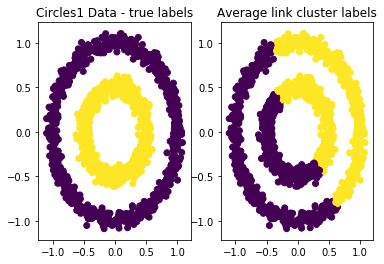

0.500414498554592: Circles1 Rand Index


In [29]:

n_clusters = 2
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y5_pred = average_linkage.fit_predict(Circles1_X)

plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y5_pred)
plt.title('Average link cluster labels')
plt.show()

e = rand_index(y5_pred, Circles1_y)
print(str(e) + ": Circles1 Rand Index")


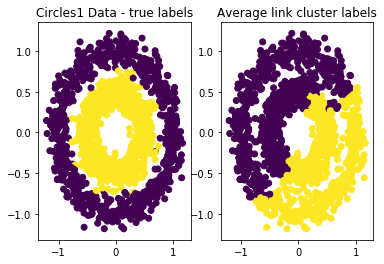

0.5000587058038692: Circles2 Rand Index


In [30]:
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y6_pred)
plt.title('Average link cluster labels')
plt.show()

f = rand_index(y6_pred, Circles2_y)
print(str(f) + ": Circles2 Rand Index")


<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> The datasets in decreasing order of Rand-Index scores

<br>0.99911140760507: Blobs 1 Rand Index
<br>0.7636575494774294: Blobs 2 Rand Index
<br>0.7457647320435846: Moons2 Rand Index
<br>0.7132310429175005: Moons1 Rand Index
<br>0.500414498554592: Circles1 Rand Index
<br>0.5000587058038692: Circles2 Rand Index




<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> The datasets ranking came consistent to what we saw earlier, with blobs on top, followed by Moons and Circles datasets. Avg link performed quite comparably on Moons1 and Moons2, Circles1 and Circles2 datasets.



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> DBScan is expected to work well on all but Blobs2 as we can see a clear separation of densities in all the datasets. A good separation of data points densities in different clusters will ensure it perfoms well on all but Blob2.



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> DBScan is not expected to work well in Blobs2 as the bottom data points are overlapping and the core points for the two clusters will be merged. Hence, it won't perform well on Blobs 2 data set.




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span> Based on the visualization below we can : DBScan gave same clusters as the orginal one as follows for the datasets in decreasing order :
<br> Blobs1, Moons1, Circles1 (almost clean separation)
<br> Moons2, Circles2 (slight overlap of datapoints from the 2 clusters and some points were wrongly classified as outliers)
<br> Blobs2 (2 bottom clusters merged).
<br> DBScan works on the concept of find local densities of the points and therefore clear separation of clusters with right value of e and min points is generating good results for almost all the datasets but Blobs2 



3 : Noise Points Blob1


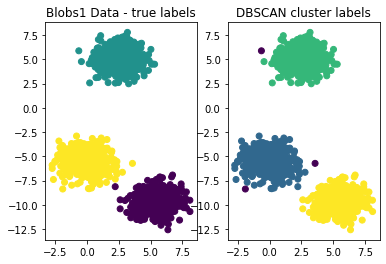

0.997781632199244: Blobs1 Rand Index


In [135]:
dbscan = DBSCAN(eps=1, min_samples=10)
y_pred = dbscan.fit_predict(Blobs1_X)

noise = np.sum(y_pred==-1)
print(str(noise) + " : Noise Points Blob1")

plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Blobs1_y and y_pred by to eliminate the error.
Blobs1_y_new = Blobs1_y + 1
y_pred = y_pred + 1
a = rand_index(y_pred, Blobs1_y_new)
print(str(a) + ": Blobs1 Rand Index")

188 : Noise Points Blob2


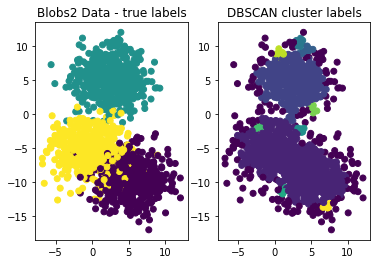

0.7293137647320436: Blobs2 Rand Index


In [139]:
dbscan = DBSCAN(eps=.7, min_samples=6)
y_pred = dbscan.fit_predict(Blobs2_X)

noise = np.sum(y_pred==-1)
print(str(noise) + " : Noise Points Blob2")

plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Blobs2_y and y_pred by to eliminate the error.
Blobs2_y_new = Blobs2_y + 1
y_pred = y_pred + 1

a = rand_index(y_pred, Blobs2_y_new)
print(str(a) + ": Blobs2 Rand Index")

0: Noise Points Moons1


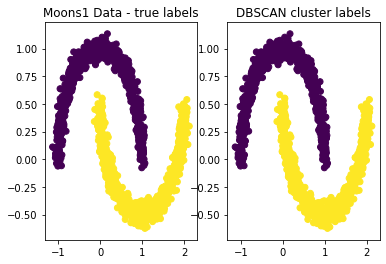

1.0: Moons1 Rand Index


In [140]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
y_pred = dbscan.fit_predict(Moons1_X)

noise = np.sum(y_pred==-1)
print(str(noise) + ": Noise Points Moons1")

plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Moons1_y and y_pred by to eliminate the error.
Moons1_y_new = Moons1_y + 1
y_pred = y_pred + 1

a = rand_index(y_pred, Moons1_y_new)
print(str(a) + ": Moons1 Rand Index")

16 : Noise Points Moons2


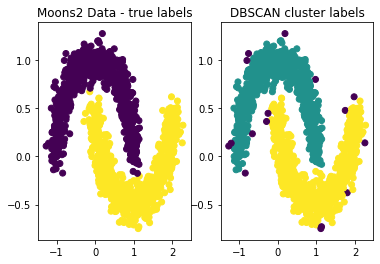

0.9854311763397821: Moons2 Rand Index


In [141]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
y_pred = dbscan.fit_predict(Moons2_X)

noise = np.sum(y_pred==-1)
print(str(noise) + " : Noise Points Moons2")

plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Moons2_y and y_pred by to eliminate the error.
Moons2_y_new = Moons2_y + 1
y_pred = y_pred + 1

a = rand_index(y_pred, Moons2_y_new)
print(str(a) + ": Moons2 Rand Index")

0 : Noise Points Circles1


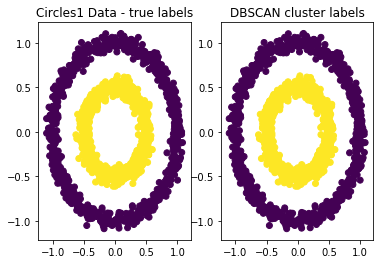

1.0: Circles1 Rand Index


In [142]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
y_pred = dbscan.fit_predict(Circles1_X)

noise = np.sum(y_pred==-1)
print(str(noise) + " : Noise Points Circles1")

plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Circles1_y and y_pred by to eliminate the error.
Circles1_y_new = Circles1_y + 1
y_pred = y_pred + 1

a = rand_index(y_pred, Circles1_y_new)
print(str(a) + ": Circles1 Rand Index")

37 : Noise Points Circles2


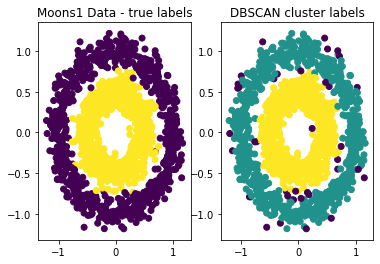

0.9643344451856793: Circles2 Rand Index


In [143]:
dbscan = DBSCAN(eps=0.11, min_samples=10)
y_pred = dbscan.fit_predict(Circles2_X)

noise = np.sum(y_pred==-1)
print(str(noise) + " : Noise Points Circles2")

plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#to account for noise incrementing both Circles2_y and y_pred by to eliminate the error.
Circles2_y_new = Circles2_y + 1
y_pred = y_pred + 1

a = rand_index(y_pred, Circles2_y_new)
print(str(a) + ": Circles2 Rand Index")

<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

<span style="color:green">**Answer:** </span>

Noise Points:
<br>3 : Noise Points Blob1
<br>188 : Noise Points Blob2
<br>0: Noise Points Moons1
<br>16 : Noise Points Moons2
<br>0 : Noise Points Circles1
<br>37 : Noise Points Circles2
<br>
<br> Moons1, Circles1 and Blobs 1 have the least number of noise points
<br>
<br> The data points in the respective clusters seem to be continous for the above datasets escpecially Moons1 and Circles1, therefore majority of the points are either core or border thus there are no major number of noise points.



<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> Ranking of datasets in decreasing order of Rand Index scores:
<br>1.0: Moons1 Rand Index
<br>1.0: Circles1 Rand Index
<br>0.997781632199244: Blobs1 Rand Index
<br>0.9854311763397821: Moons2 Rand Index
<br>0.9643344451856793: Circles2 Rand Index
<br>0.7293137647320436: Blobs2 Rand Index





<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Yes, the rankings came to consistent between 5c and 5e as it was expected that clusters with continuous datapoints and clear density separation from other clusters will perform well for DBScan algorithm. The same trend was confirmed by the Rand_index for the datasets.



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> For Spectral Clustering it;s tough to comment visually doesn't necessarily make strong assumptions like shape or distribution of the data and is expected to perform well with a variety of shapes of the data. Spectral clustering should perform well on all the datasets. 



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> It's tough to tell viusally as Spectral Clustering doesn't necessarily make strong assumptions like shape or distribution of the data and is expected to perform well with a variety of shapes of the data. Spectral clustering should perform well on all the datasets.



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span> Based on the visual inspection the clustering can be ranked in the order as shown below (decreasing):
 
 <br>Blob 1 >
 <br>Blob 2 >
 <br>Moons2 >
 <br>Moons1 > 
 <br>Circles2 = Circles1
 
 Visually, the ranking came out to be very close to what we observed for K means clustering. This might be potentially because the final step in spectral clustering using eigen vectors and implements K means to cluster the data.



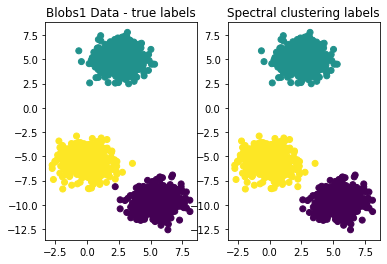

0.99911140760507: Blobs1 Rand Index


In [144]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Blobs1_X)

plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Blobs1_y)
print(str(a) + ": Blobs1 Rand Index")

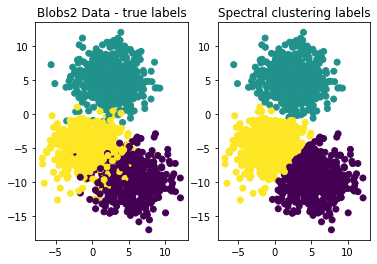

0.919189682010229: Blobs1 Rand Index


In [145]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Blobs2_X)

plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Blobs2_y)
print(str(a) + ": Blobs1 Rand Index")

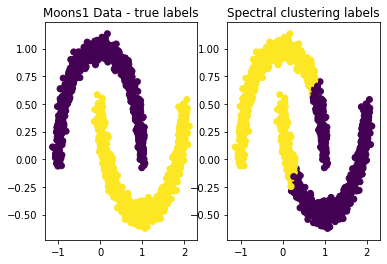

0.6441263064265066: Moons1 Rand Index


In [41]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Moons1_X)

plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Moons1_y)
print(str(a) + ": Moons1 Rand Index")

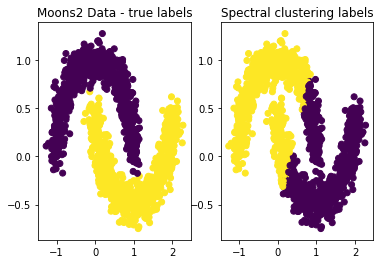

0.6448441183010896: Moons2 Rand Index


In [42]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Moons2_X)

plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Moons2_y)
print(str(a) + ": Moons2 Rand Index")

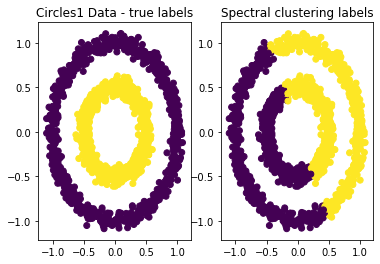

0.49966733377807426: Circles1 Rand Index


In [43]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Circles1_X)

plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Circles1_y)
print(str(a) + ": Circles1 Rand Index")

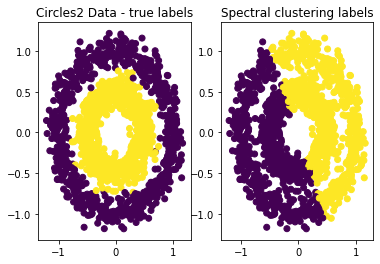

0.4997553924838781: Circles2 Rand Index


In [146]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Circles2_X)

plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

a = rand_index(y_pred, Circles2_y)
print(str(a) + ": Circles2 Rand Index")

<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> Datasets in decreasing order of Rand Index scores:
<br>0.99911140760507: Blobs1 Rand Index
<br>0.919189682010229: Blobs2 Rand Index
<br>0.6448441183010896: Moons2 Rand Index
<br>0.6441263064265066: Moons1 Rand Index
<br>0.49966733377807426: Circles1 Rand Index
<br>0.4997553924838781: Circles2 Rand Index

<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Rankings came out to be consistent in both the parts, which is similar to the trend that we saw in K means clustering. As spectral clustering doesn't make assumption on shape and distribution of the data, a potential explanation to this can be usage of eigen vectors to perform k means clustering in the final step of spectral clustering yielding similar results to k means clustering.

### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Visually it seems that the globular (blobs data set) and to some extend the moons data set exhibit good clustering tendency as there is good cohesion with the clusters and better separation with respect to other clusters in the dataset. Circles 1 dataset has high cohesion and good separation as well but because of one cluster surrounding the other there might be difficulty in clustering datasets. 



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Rand data set doesn't show good clustering tendency as the data points are uniformly spread in the space.



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

<span style="color:green">**Answer:** </span> Decreasing order of Hopkins metric:

hopkins(Blobs1_X) > hopkins(Moons1_X) > hopkins(Moons2_X) > hopkins(Circles1_X) > hopkins(Blobs2_X) > hopkins(Circles2_X) > hopkins(Rand_X)



In [45]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    n = X.shape[0] #rows
    d = X.shape[1] #cols
    p = int(0.1 * n) #considering 10% of points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n), p) 
 
    uj = []
    wj = []
    for j in range(0, p):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        uj.append(u_dist[0][1]) #distances to nearest neighbors in random data
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wj.append(w_dist[0][1]) #distances to nearest neighbors in real data
 
    H = sum(uj) / (sum(uj) + sum(wj))
    if isnan(H):
        print(uj, wj)
        H = 0
 
    return H

In [46]:
hopkins(Blobs1_X)

0.9301012153897917

In [47]:
hopkins(Blobs2_X)

0.8464195684071671

In [48]:
hopkins(Moons1_X)

0.9173441450033086

In [49]:
hopkins(Moons2_X)

0.8851523273122538

In [50]:
hopkins(Circles1_X)

0.848954052297635

In [161]:
hopkins(Circles2_X)

0.7486056095409028

In [162]:
hopkins(Rand_X)

0.6180856686251042

<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span> Yes, the hopkins values came out to be constent with what we expected basis dataset's shapes, distribution and compactness.



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

<span style="color:green">**Answer:** </span> 
<br> 1.KMeans - We saw three clusters as K means on initalization of 3 centroids is trying to minimize the SSE and clustering the datasets in three triangles.
<br> 2.GMM - We again see three clusters, as GMM assumes data is coming from normal distribution models and since the data is uniformly spread. There are three clusters filling the rand data space.
<br> 3.Single linkage - We see there is one cluster and there is one data point that is left out. The single link keeps on merging the datapoints basis min distance.
<br> 4.Complete linkage - We see there are three clusters. The complete link merges clusters basis farthest datapoints. It is breaking on the large data set and clustering doesn't seem to be necessarily correct.
<br> 5.Average linkage - We again see there are three clusters. The average link merges clusters basis average datapoints between two clusters. It is breaking on the large and uniformly spread data set. Clustering doesn't seem to be necessarily correct.
<br> 6.DBSCAN - There is uniform density for the Random dataset, hence we see a single cluster as per DBScan algorithm as it keeps on connecting data points basis similarly dense local datapoints clusters.
<br> 7.Spectral - Spectral dataset works as per graph node connection and partitioning basis weaker weights of the edges. Since the data is uniformly spread it's tough to comment on the clustering rationale. We do see 3 clusters as per spectral but then any clustering algorithm generates output. This is not necessaring true clustering always.



98.83690511496927


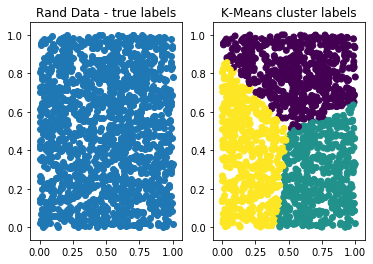

In [52]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred = kmeans.fit_predict(Rand_X)

score = -kmeans.score(Rand_X)
print(score)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

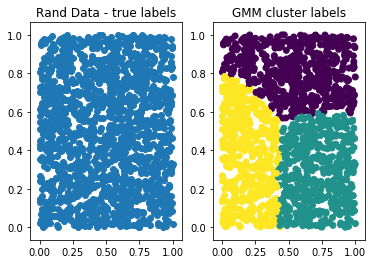

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Log scale: values of z <= 0 have been masked


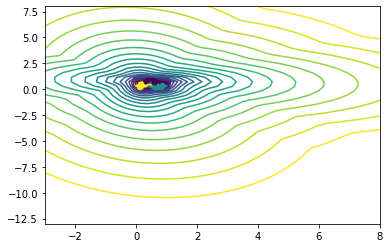

In [53]:
n_clusters = 3;
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
y_pred = gmm.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)  # EM clusters
plt.title('GMM cluster labels')
plt.show()
from matplotlib.colors import LogNorm

x = np.linspace(-3, 8) #x-axis
y = np.linspace(-13, 8) #y-axis
X, Y = np.meshgrid(x, y) #grid
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX) #probability at each point
Z = Z.reshape(X.shape)

plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)  #plot data
plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 20)) #plot prob. density
plt.show()


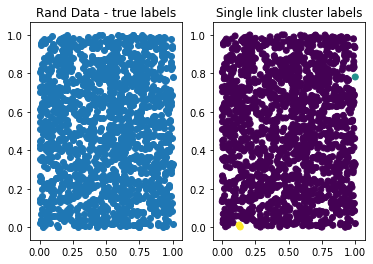

In [54]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred = single_linkage.fit_predict(Rand_X)

plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Single link cluster labels')
plt.show()

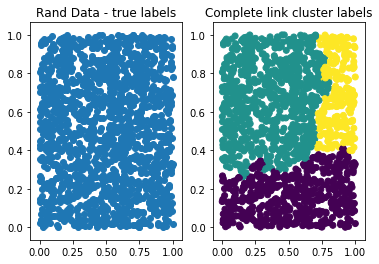

In [55]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred = complete_linkage.fit_predict(Rand_X)

plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Complete link cluster labels')
plt.show()

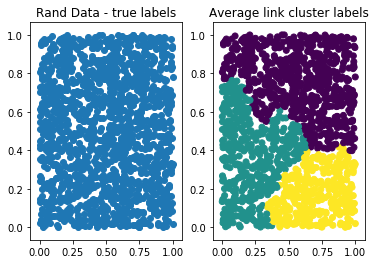

In [56]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred = average_linkage.fit_predict(Rand_X)

plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Average link cluster labels')
plt.show()

0


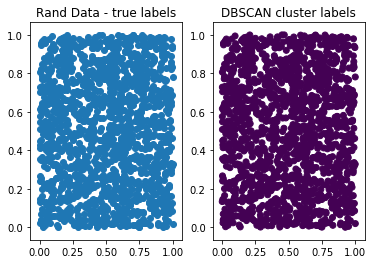

In [57]:
dbscan = DBSCAN(eps=1, min_samples=10)
y_pred = dbscan.fit_predict(Rand_X)

noise = np.sum(y_pred==-1)
print(noise)

plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

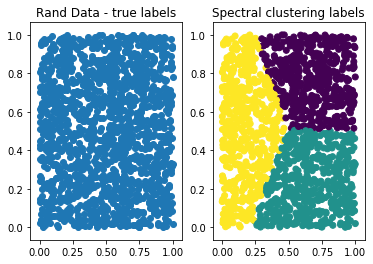

In [58]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Rand_X)

plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [59]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [68]:
cancer.feature_names
cancer
# cancer.head()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Class labels are:

In [61]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [62]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [63]:
Cancer_X.shape

(569, 30)

In [69]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [72]:
score = np.zeros(41);
for i in range(2,40):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

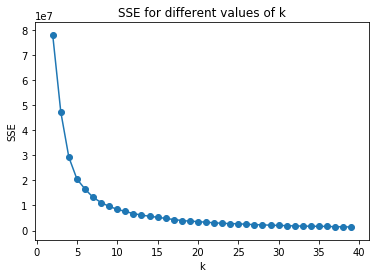

In [73]:
plt.plot(range(2,40),score[2:40])
plt.scatter(range(2,40),score[2:40])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span> Looking at the plot, it feels like the elbow is coming around k = 3. 



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

In [74]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

y_pred = kmeans.fit_predict(Cancer_X)

score = -kmeans.score(Cancer_X)
print(score)

47285926.90370673


<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

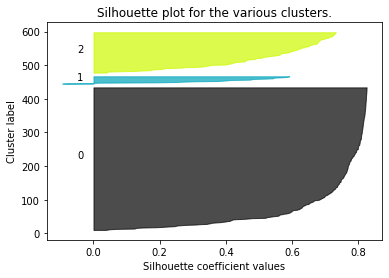

In [80]:
silhouette_values = silhouette(Cancer_X, y_pred)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span> This plots indicates that most points in 'black' and 'yellow' cluster exhibit very strong cohesion and separation, while points in 'blue' cluster 2 do not, also we see negative silhouette cofficient values for blue clusters indicating presence of outliers. K means for 3 clusters seems to be good as per the silhouette values.

<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [82]:
a = rand_index(y_pred, Cancer_y)
print(str(a) + ": Cancer Rand Index")

0.7619062353028541: Cancer Rand Index


<span style="color:green">**Answer:** </span> As the values are ~0.76, we can say that the clusterings are similar to the ground truth to an extent, but not entirely similar to it.

<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

[[1, 1, 1, 2, 1], [2, 2, 1, 1, 1], [1, 1, 1, 2, 2], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


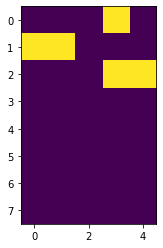

In [85]:
m=[50,100,150,200,250,300,400,500]
n=[10,15,20,25,30]
k=[]
l=[]
for i in m:
    for j in n:
        dbscan = DBSCAN(eps=i, min_samples=j)
        y_pred = dbscan.fit_predict(Cancer_X)
        k1=max(y_pred)+1
        k.append(k1)

while k != []:
    l.append(k[:5])
    k = k[5:]
print(l)
# len(k)
plt.imshow(l)

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

58.85
[[187, 195, 206, 220, 262], [56, 100, 143, 148, 158], [27, 34, 41, 62, 96], [20, 21, 25, 31, 31], [18, 20, 20, 22, 22], [12, 15, 19, 20, 21], [11, 11, 11, 13, 13], [5, 8, 8, 11, 11]]


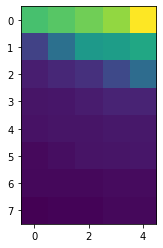

In [91]:
m=[50,100,150,200,250,300,400,500]
n=[10,15,20,25,30]
k=[]
l=[]
for i in m:
    for j in n:
        dbscan = DBSCAN(eps=i, min_samples=j)
        y_pred = dbscan.fit_predict(Cancer_X)
        k1=sum(y_pred==-1)
        k.append(k1)

print(sum(k)/len(k))

while k != []:
    l.append(k[:5])
    k = k[5:]
print(l)
# len(k)
plt.imshow(l)

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span> Based on the matrices generated we can comment:
<br> 1. Dbscan for majority of the eps values and min_samples has found a single cluster in the dataset. The maximum number of clusters that were found in the matrix is 2, this is in line with the true known labels in the cancer data set - benign and malignant.
<br> 2. The outliers generated for different values of value and min sample were in the range 5 to 220, with an average outlier value equal to 58.85. We can comment like any other real world data set the cancer data set has also presence of outliers as identified by running DBScan a number of times.

<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

<span style="color:green">**Answer:** </span> In 8g we saw a value of Rand Index as 0.76 for K means- clustering when k was equal to 3. This is a good value but when we used DBScan clustering we could see the maximum numbers of clusters that were found for multiple combinations of eps and min_samples was 2. 2 is a prefered value as it is in line with the number of true labels seen in the training data set i.e. benign and malignant. We also see a number of values for outliers, we don't want a huge number of outliers meaning a lot of points are left out (underfitting the data), also we don't want a case where there are less number of outlier (overfitting the data). For k = 2, we choose a combination of eps and min samples such that we are close to average outliers seen in the noise matrix, avg is 58.85, therefore we choose row 2 col 2 with 100 outliers.

<br> Hence, the value for eps = 100 and min_samples = 15

In [160]:
dbscan = DBSCAN(eps=100, min_samples=15)
y_pred = dbscan.fit_predict(Cancer_X)

#to account for noise incrementing both Cancer_y and y_pred by to eliminate the error.
Cancer_y_new = Cancer_y + 1
y_pred = y_pred + 1
a = rand_index(y_pred, Cancer_y_new)
print(str(a) + ": Cancer Data Rand Index For DBScan")

0.7419614346889775: Cancer Data Rand Index For DBScan


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span> Rand Index for K means clustering with 3 labels came out to be 0.76 while with DBScan with 2 clusters and optimal eps and min sample values it is coming out to be 0.74, the agreeging similarity is bit less as compared with dbscan but this doesn't necessarily mean that K means performed better than DBScan. A lesser similarity may be because the data is bit spread in the R^d space and K means is not properly accounting for the outliers which DBScan is.

We might though need to see few other performance metrics to concretely comment which algorithm has performed better. For now we can say it's DBScan as it is giving good rand index value and is in line with the count of true labels seen in the training data set. 

